# Desarrollo de hipótesis en el contexto de la creación de un modelo predictivo de sepsis
## Health Tech Synergy Group
* Andrés Manuel Diaz Hung
* Daniela Jimenez
* Karen Borda
* Jorge Rivera
* Zulay Arenas

En este notebook vamos a implementar el análisis exploratorio de datos (EDA) para analizar datasets para resumir sus principales características.
Usando EDA, se puede entender una dataset de una manera fácil, encontrar patrones, identificar valores anómalos y explorar a relación entre variables usando técnicas tanto gráficas como no gráficas.

EDA también nos ayuda a escoger cuál característica debe ser considerada para usar en nuestro modelo de machine learning.

## Tabla de contenido
1. Entendiendo el caso
2. Descripción de las variables
3. Entendimiento de las variables
4. Limpieza de las variables
5. Visualización de los datos

## 1. Entendiendo el caso
Nuestro problema aborda una serie de datos clínicos, para-clínicos y socio demográficos de pacientes que han desarrollado sepsis. Nuestro equipo "Health Tech Synergy" desarrolla predictivo para determinar la suceptibilidad de un individuo par desarrollar sepsis a partir de estos datos.

## 2. Descripción de las variables

Cargaremos la base de datos para el análisis de su contenido. Utilizando ChatGPT

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

filename = 'data/sepsis_ejemplo.csv'
df = pd.read_csv(filename)

In [4]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,1353110,53,53,61.5,99.5,38.25,140.0,89.0,64.0,20.0,...,NaN,NaN,72.00,1,0.0,1.0,-84.73,54,0,117203
1,1259425,15,15,90.0,96.0,36.80,125.0,77.0,54.0,20.0,...,NaN,NaN,75.00,0,0.0,1.0,-25.44,16,0,115025
2,15353,18,18,78.0,97.0,NaN,121.0,86.0,76.0,21.0,...,NaN,NaN,68.63,1,0.0,1.0,-67.35,23,0,14692
3,223518,26,26,82.0,95.0,NaN,133.0,80.0,59.0,12.0,...,NaN,NaN,66.36,1,NaN,NaN,-0.02,31,0,16777
4,917766,23,23,84.0,96.0,NaN,151.0,130.0,115.0,26.0,...,NaN,NaN,55.00,0,0.0,1.0,-6.26,24,0,100738


In [5]:
print(df.columns)

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Hour', 'HR', 'O2Sat', 'Temp', 'SBP',
       'MAP', 'DBP', 'Resp', 'EtCO2', 'BaseExcess', 'HCO3', 'FiO2', 'pH',
       'PaCO2', 'SaO2', 'AST', 'BUN', 'Alkalinephos', 'Calcium', 'Chloride',
       'Creatinine', 'Bilirubin_direct', 'Glucose', 'Lactate', 'Magnesium',
       'Phosphate', 'Potassium', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb',
       'PTT', 'WBC', 'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1',
       'Unit2', 'HospAdmTime', 'ICULOS', 'SepsisLabel', 'Patient_ID'],
      dtype='object')


### Eliminación de columnas sin información

Después de utilizar a ChatGPT para lograr una descripción de las variables, se ha llegado a un consenso entre el equipo, y se eliminaran las siguientes variables:

- Unnamed 0.1 y Unnamed: 0: Estas variables no tienen información acerca de que representan, y parece que hacen parte de una codificación propia del sistema.

- Hour: Esta variable corresponde a la codificación de la hora de registro y no es relevante clínicamente.

- TroponinI: Troponina 1, dado a que es marcador de daño cardíaco y no es relevante en nuestro estudio de sepsis.

In [6]:
# drop variables Unnamed 0.1 and Unnamed: 0
df.drop(['Unnamed: 0.1', 'Unnamed: 0', 'Hour', 'TroponinI'], axis=1, inplace=True)
df.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,61.5,99.5,38.25,140.0,89.0,64.0,20.0,34.5,NaN,NaN,...,NaN,NaN,72.00,1,0.0,1.0,-84.73,54,0,117203
1,90.0,96.0,36.80,125.0,77.0,54.0,20.0,NaN,NaN,NaN,...,NaN,NaN,75.00,0,0.0,1.0,-25.44,16,0,115025
2,78.0,97.0,NaN,121.0,86.0,76.0,21.0,NaN,NaN,NaN,...,NaN,NaN,68.63,1,0.0,1.0,-67.35,23,0,14692
3,82.0,95.0,NaN,133.0,80.0,59.0,12.0,NaN,NaN,NaN,...,NaN,NaN,66.36,1,NaN,NaN,-0.02,31,0,16777
4,84.0,96.0,NaN,151.0,130.0,115.0,26.0,NaN,NaN,NaN,...,NaN,NaN,55.00,0,0.0,1.0,-6.26,24,0,100738



| **Variable**       | **Tipo**         | **Descripción**                                                                                                                                           |
|--------------------|------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------|
| HR                 | Clínica           | Frecuencia cardíaca del paciente (pulsaciones por minuto).                                                                                                |
| O2Sat              | Clínica           | Saturación de oxígeno en la sangre (%).                                                                                                                   |
| Temp               | Clínica           | Temperatura corporal (°C).                                                                                                                                |
| SBP                | Clínica           | Presión arterial sistólica (mmHg).                                                                                                                        |
| MAP                | Clínica           | Presión arterial media (mmHg).                                                                                                                            |
| DBP                | Clínica           | Presión arterial diastólica (mmHg).                                                                                                                       |
| Resp               | Clínica           | Frecuencia respiratoria (respiraciones por minuto).                                                                                                        |
| SepsisLabel        | Clínica           | Indicador de sepsis (0: No sepsis, 1: Sepsis).                                                                                                            |
| ICULOS             | Clínica           | Duración de la estancia en la unidad de cuidados intensivos (horas).                                                                                       |
| EtCO2              | Paraclínica       | Presión de dióxido de carbono al final de la espiración.                                                                                                   |
| BaseExcess         | Paraclínica       | Exceso de base en la sangre (medido en mEq/L).                                                                                                            |
| HCO3               | Paraclínica       | Bicarbonato en sangre (mEq/L).                                                                                                                            |
| FiO2               | Paraclínica       | Fracción inspirada de oxígeno (porcentaje).                                                                                                               |
| pH                 | Paraclínica       | pH sanguíneo.                                                                                                                                            |
| PaCO2              | Paraclínica       | Presión parcial de dióxido de carbono (mmHg).                                                                                                             |
| SaO2               | Paraclínica       | Saturación de oxígeno arterial (%).                                                                                                                       |
| AST                | Paraclínica       | Aspartato aminotransferasa, un marcador de daño hepático.                                                                                                 |
| BUN                | Paraclínica       | Nitrógeno ureico en sangre (mg/dL), indicador de función renal.                                                                                           |
| Alkalinephos       | Paraclínica       | Fosfatasa alcalina, un marcador de función hepática y ósea.                                                                                               |
| Calcium            | Paraclínica       | Nivel de calcio en la sangre (mg/dL).                                                                                                                     |
| Chloride           | Paraclínica       | Nivel de cloro en la sangre (mmol/L).                                                                                                                     |
| Creatinine         | Paraclínica       | Creatinina en sangre, indicador de la función renal (mg/dL).                                                                                              |
| Bilirubin_direct   | Paraclínica       | Bilirrubina directa (mg/dL).                                                                                                                              |
| Glucose            | Paraclínica       | Nivel de glucosa en sangre (mg/dL).                                                                                                                       |
| Lactate            | Paraclínica       | Nivel de lactato en sangre, indicador de hipoxia (mmol/L).                                                                                                |
| Magnesium          | Paraclínica       | Nivel de magnesio en sangre (mg/dL).                                                                                                                      |
| Phosphate          | Paraclínica       | Nivel de fosfato en sangre (mg/dL).                                                                                                                       |
| Potassium          | Paraclínica       | Nivel de potasio en sangre (mmol/L).                                                                                                                      |
| Bilirubin_total    | Paraclínica       | Bilirrubina total en sangre (mg/dL).                                                                                                                      |                     |
| Hct                | Paraclínica       | Hematocrito, proporción de glóbulos rojos en la sangre (%).                                                                                               |
| Hgb                | Paraclínica       | Hemoglobina en sangre (g/dL).                                                                                                                             |
| PTT                | Paraclínica       | Tiempo de tromboplastina parcial, evalúa la coagulación (segundos).                                                                                       |
| WBC                | Paraclínica       | Recuento de glóbulos blancos (10^9/L).                                                                                                                    |
| Fibrinogen         | Paraclínica       | Nivel de fibrinógeno en sangre (mg/dL), un factor de coagulación.                                                                                         |
| Platelets          | Paraclínica       | Conteo de plaquetas en sangre (10^9/L).                                                                                                                   |
| Age                | Sociodemográfica  | Edad del paciente (años).                                                                                                                                 |
| Gender             | Sociodemográfica  | Género del paciente (0: Mujer, 1: Hombre).                                                                                                                |
| Unit1              | Sociodemográfica  | Unidad en la que se encuentra el paciente (0: No es unidad 1, 1: Es unidad 1).                                                                            |
| Unit2              | Sociodemográfica  | Segunda unidad en la que se encuentra el paciente (0: No es unidad 2, 1: Es unidad 2).                                                                    |
| HospAdmTime        | Sociodemográfica  | Tiempo desde la admisión hospitalaria hasta el inicio del registro (horas).                                                                                |
| Patient_ID         | Sociodemográfica  | Identificación única del paciente.                                                                                                                        |



## 3. Entendimiento de los datos
Para comprender los datos debemos cargarlos en nuestro sistema. Para comenzar cargamos las  librerías necesarias para nuestro análisis.

### Visualizando algunas variables
Obtenemos las 5 primeras filas del dataset. Esto se hace con la función *df.head()* para obtener una muestra al azar se usa *df.sample()*. Para obtener las últimas se usa *df.tail()*.

In [7]:
df.tail()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
15517,95.0,99.0,39.06,95.0,82.0,75.0,20.5,NaN,NaN,NaN,...,NaN,NaN,61.85,1,NaN,NaN,-0.02,25,0,18098
15518,86.0,97.0,NaN,134.0,86.0,58.0,21.0,NaN,NaN,NaN,...,NaN,NaN,84.70,0,NaN,NaN,-7.13,11,0,14566
15519,97.0,95.0,NaN,114.0,78.0,59.0,31.0,NaN,NaN,NaN,...,NaN,NaN,37.00,1,0.0,1.0,-6.62,23,0,104826
15520,75.0,100.0,NaN,NaN,69.0,NaN,20.0,NaN,NaN,NaN,...,NaN,NaN,81.80,0,1.0,0.0,-0.02,16,0,10437
15521,77.0,96.0,NaN,131.0,92.0,67.0,24.0,NaN,NaN,NaN,...,NaN,NaN,61.00,1,1.0,0.0,-5.92,14,0,105303


### Obteniendo información general de la base de datos
El método *df.info()* devuelve la información acerca del Dataframe incluyendo el índice, el tipo de datos y columnas, valores no nulos y la memoria usada

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15522 entries, 0 to 15521
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HR                13933 non-null  float64
 1   O2Sat             13479 non-null  float64
 2   Temp              5204 non-null   float64
 3   SBP               13204 non-null  float64
 4   MAP               13522 non-null  float64
 5   DBP               10628 non-null  float64
 6   Resp              13048 non-null  float64
 7   EtCO2             570 non-null    float64
 8   BaseExcess        779 non-null    float64
 9   HCO3              643 non-null    float64
 10  FiO2              1232 non-null   float64
 11  pH                1001 non-null   float64
 12  PaCO2             821 non-null    float64
 13  SaO2              528 non-null    float64
 14  AST               261 non-null    float64
 15  BUN               1046 non-null   float64
 16  Alkalinephos      263 non-null    float6

### Número de pacientes en la base de datos

In [8]:
#print the number of unique values for the Patient_ID column
print(df['Patient_ID'].nunique())

12419


Del anterior análisis notamos que los 15522 registros en la base de datos, corresponden a 12419 pacientes

### Estadisticas descriptivas para la base de datos

In [9]:
df.describe()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
count,13933.000000,13479.000000,5204.000000,13204.000000,13522.000000,10628.000000,13048.000000,570.000000,779.000000,643.000000,...,108.000000,931.000000,15522.000000,15522.000000,9418.000000,9418.000000,15522.000000,15522.000000,15522.000000,15522.000000
mean,84.571916,97.160732,36.965436,123.532055,82.136896,63.604582,18.746417,32.679825,-0.728370,24.345257,...,289.722222,191.363588,61.987202,0.558949,0.496178,0.503822,-55.780407,26.870378,0.017781,59807.965533
std,17.398287,2.978057,0.770606,23.349641,16.558597,14.262691,5.159581,8.288760,4.694719,4.330079,...,156.084439,97.330140,16.365492,0.496529,0.500012,0.500012,163.009917,28.860795,0.132160,50286.653500
min,31.000000,20.000000,31.900000,39.000000,21.000000,20.000000,1.000000,10.000000,-20.000000,7.000000,...,52.000000,8.000000,15.000000,0.000000,0.000000,0.000000,-5366.860000,1.000000,0.000000,9.000000
25%,72.000000,96.000000,36.500000,106.250000,71.000000,54.000000,15.500000,28.000000,-3.000000,22.000000,...,191.500000,123.500000,52.000000,0.000000,0.000000,0.000000,-45.772500,11.000000,0.000000,10241.000000
50%,83.000000,98.000000,37.000000,121.000000,80.000000,62.000000,18.000000,33.000000,0.000000,24.000000,...,258.500000,180.000000,64.000000,1.000000,0.000000,1.000000,-6.120000,21.000000,0.000000,20493.500000
75%,95.000000,99.500000,37.440000,138.000000,91.670000,72.000000,21.000000,38.000000,1.000000,27.000000,...,322.750000,237.500000,74.000000,1.000000,1.000000,1.000000,-0.040000,34.000000,0.000000,110087.000000
max,181.000000,100.000000,42.220000,296.000000,296.000000,296.000000,99.000000,79.000000,49.500000,45.000000,...,816.000000,902.000000,100.000000,1.000000,1.000000,1.000000,22.040000,330.000000,1.000000,119992.000000


## Limpieza de las variables

En esta sección buscaremos: 

- Valores perdidos 

- Valores duplicados 

In [10]:
#create a list with the percentage of missing values per column, and sorted from highest to lowest
missing = df.isnull().sum() / len(df) * 100
missing = missing[missing > 0]
missing.sort_values(inplace=True, ascending=False)
print(missing)

Bilirubin_direct    99.768071
Fibrinogen          99.304213
Bilirubin_total     98.363613
AST                 98.318516
Alkalinephos        98.305631
Lactate             97.423012
PTT                 97.055792
SaO2                96.598376
EtCO2               96.327793
Phosphate           96.018554
HCO3                95.857493
Chloride            95.490272
BaseExcess          94.981317
PaCO2               94.710733
Calcium             94.060044
Creatinine          94.002062
Platelets           94.002062
Magnesium           93.892540
WBC                 93.602629
pH                  93.551089
BUN                 93.261178
Hgb                 92.571834
FiO2                92.062878
Hct                 91.457286
Potassium           90.858137
Glucose             82.998325
Temp                66.473393
Unit1               39.324829
Unit2               39.324829
DBP                 31.529442
Resp                15.938668
SBP                 14.933643
O2Sat               13.161964
MAP       

## Estimación de las densidades de probabilidad

Con el fin de lograr escoger variables que tengan capacidad predictora, y así poder plantear mejores hipótesis, realizaremos la estimación de las densidades de probabilidad para los diferentes tipos de variables de nuestra base de datos.

### Estimación de la densidad de probabilidad en variables clínicas

In [11]:
# Variable a predecir
y = df["SepsisLabel"]
# Conjunto de variables predictoras
X = df.drop("SepsisLabel", axis=1)

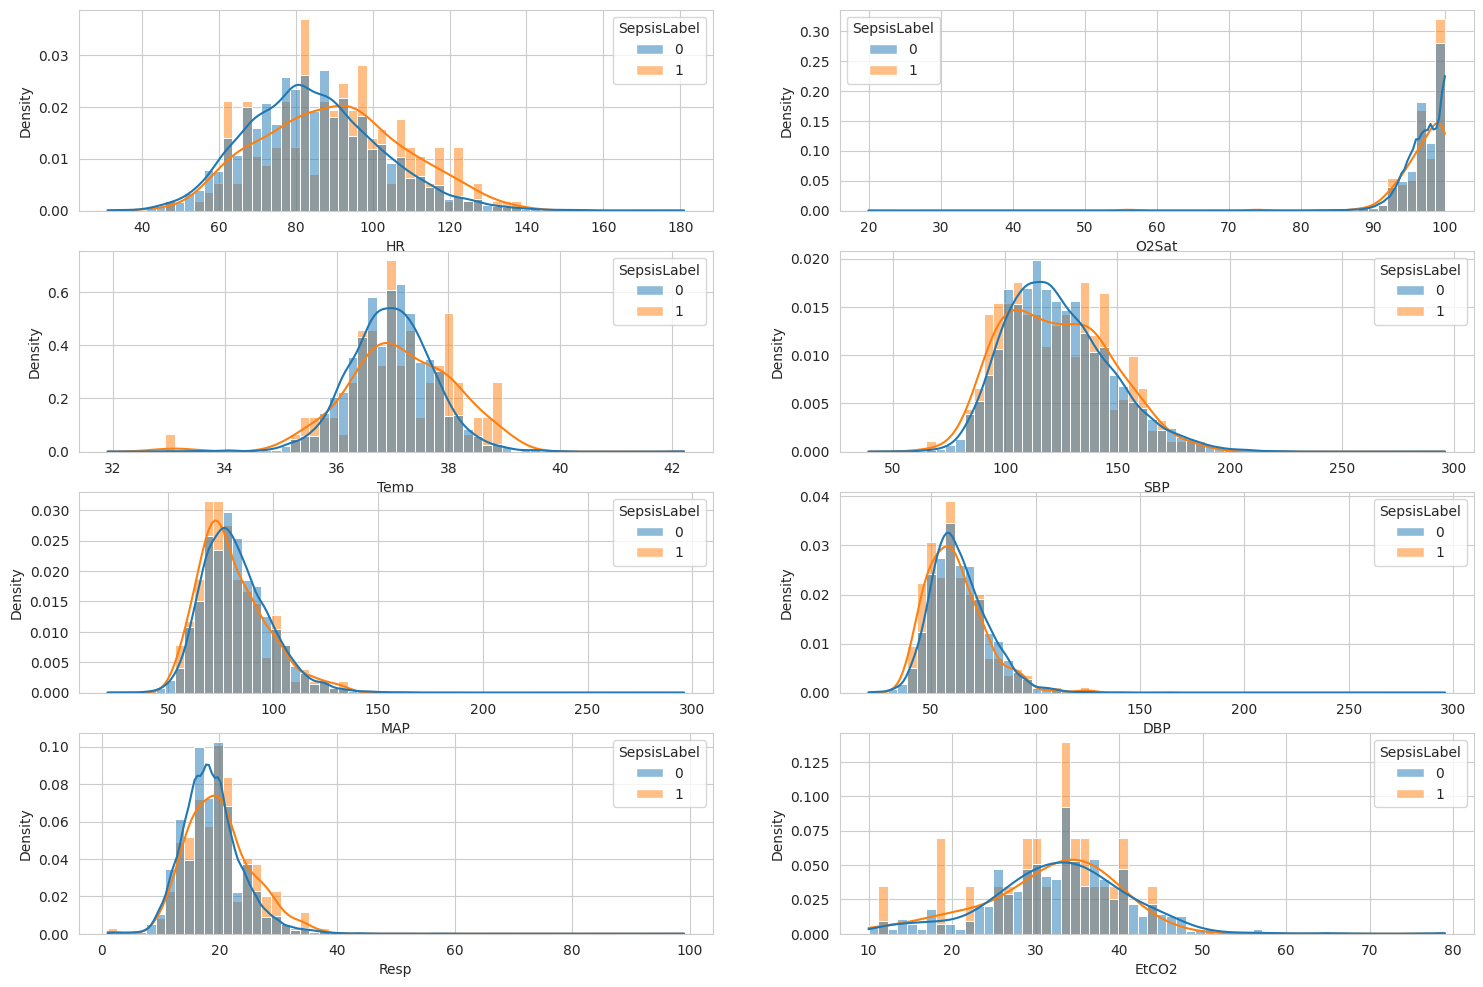

In [13]:
from sklearn.model_selection import train_test_split # data splitting into train and test


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

signos_vitales = ["HR", "O2Sat", "Temp", "SBP", "MAP", "DBP", "Resp", "EtCO2"]

plt.figure(figsize=(18,12))
#plt.subplots_adjust(hspace = .3)
plt.subplot(1,1,1)

#sns.histplot(data=X_train, x="HR", hue=y_train, stat="density", common_norm=False, bins=10, kde=True)

for i, column in enumerate(signos_vitales, 1):
    plt.subplot(4,2,i)
    sns.histplot(data=X_train, x=column, hue=y_train, stat="density", common_norm=False, bins=60, kde=True)

### Estimación de densidades de probabilidad de las variables para-clínicas.

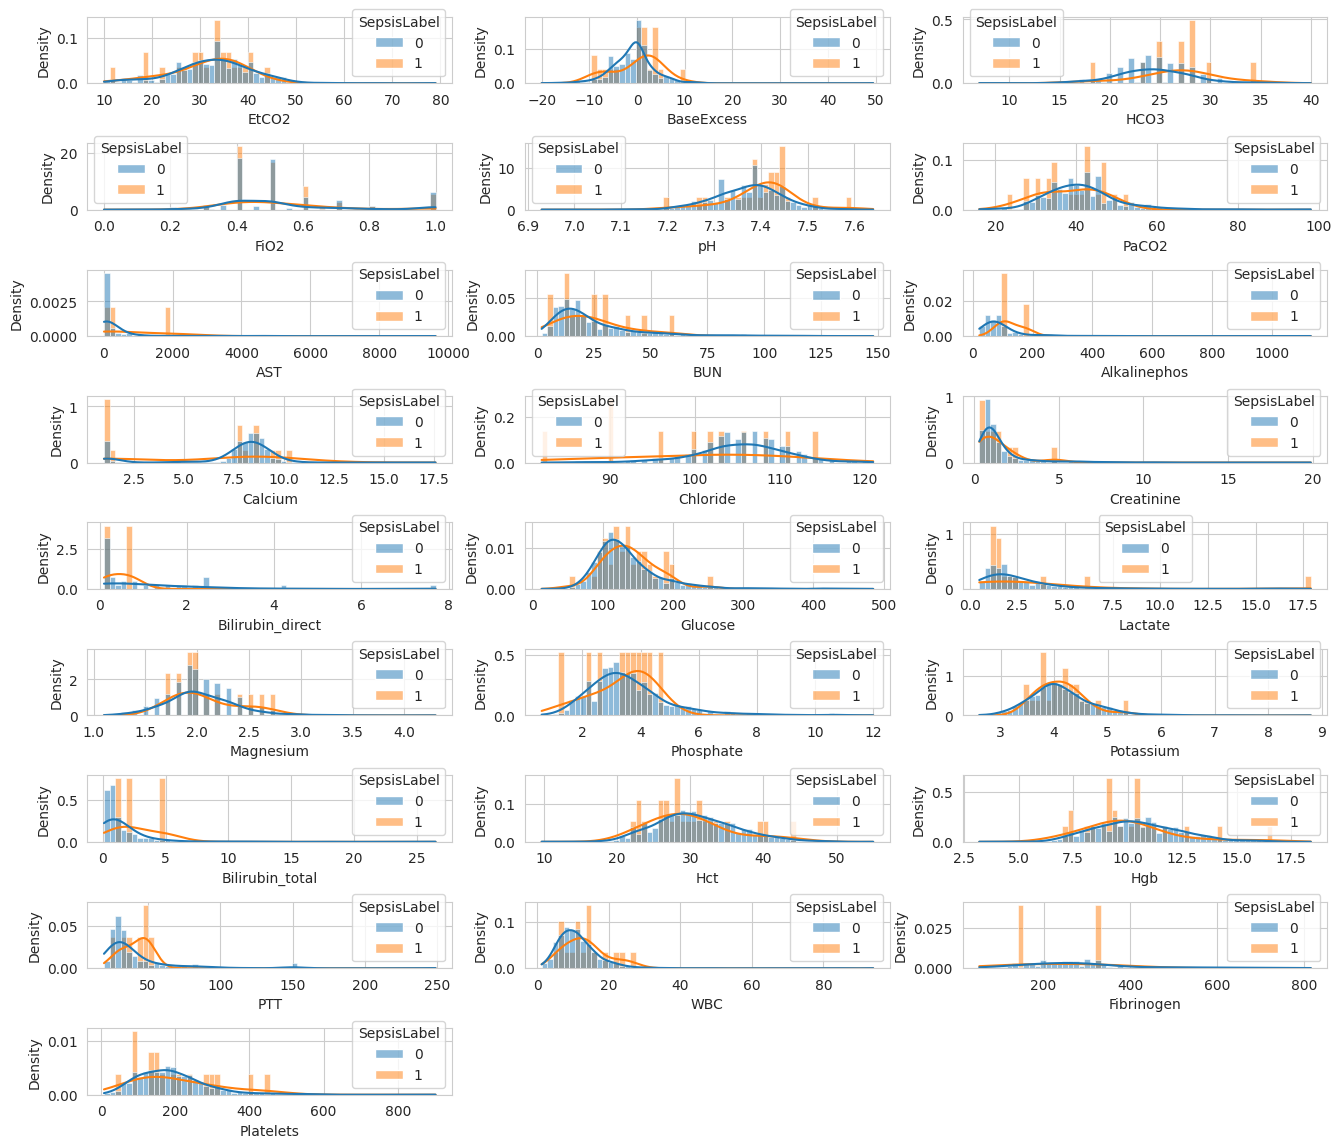

In [14]:
paraclinicas = ["EtCO2", "BaseExcess", "HCO3", "FiO2", "pH",
       "PaCO2", "AST", "BUN", "Alkalinephos", "Calcium", "Chloride",
       "Creatinine", "Bilirubin_direct", "Glucose", "Lactate", "Magnesium",
       "Phosphate", "Potassium", "Bilirubin_total", "Hct", "Hgb",
       "PTT", "WBC", "Fibrinogen", "Platelets"]

plt.figure(figsize=(16,14))
plt.subplots_adjust(hspace = .9)
plt.subplot(1,1,1)

#sns.histplot(data=X_train, x="HR", hue=y_train, stat="density", common_norm=False, bins=10, kde=True)

for i, column in enumerate(paraclinicas, 1):
    plt.subplot(9,3,i)
    sns.histplot(data=X_train, x=column, hue=y_train, stat="density", common_norm=False, bins=60, kde=True)

### Estimación de la densidad de las variables socio-demográficas

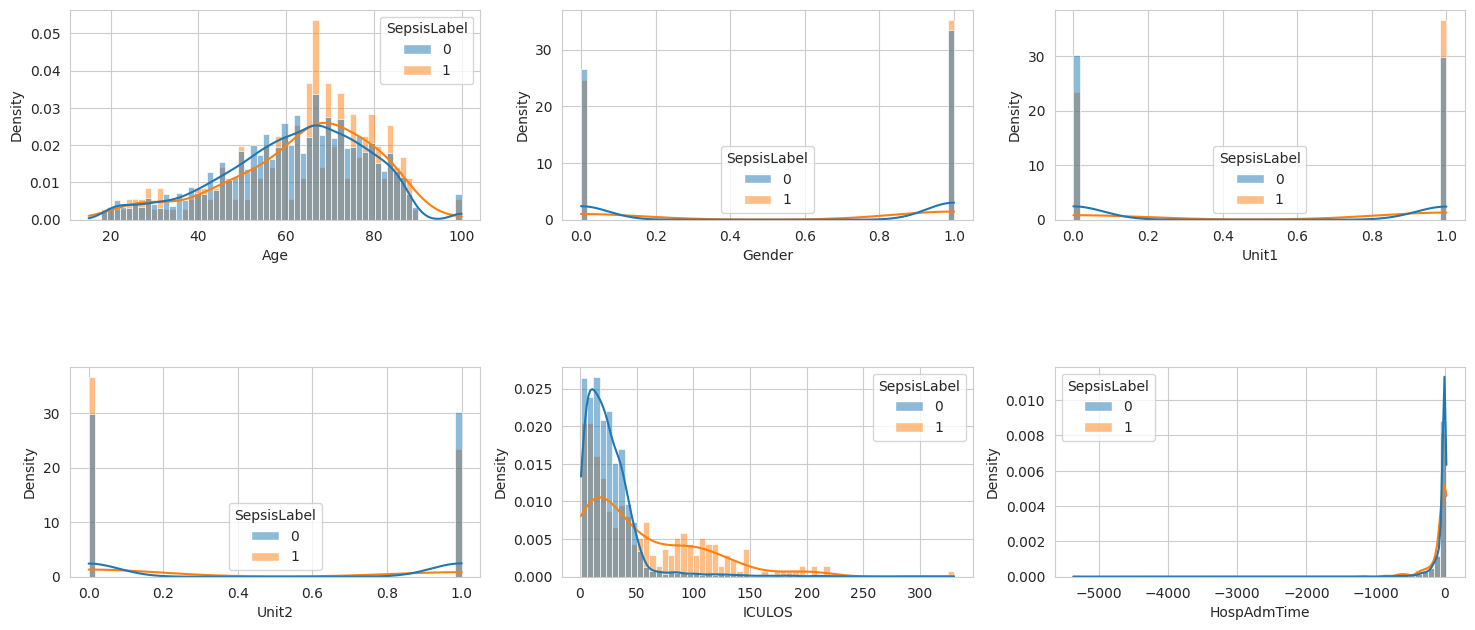

In [15]:
demograficas = ["Age", "Gender", "Unit1",
       "Unit2", "ICULOS", "HospAdmTime"]

plt.figure(figsize=(18,12))
plt.subplots_adjust(hspace = .7)
plt.subplot(1,1,1)

#sns.histplot(data=X_train, x="Age", hue=y_train, stat="density", common_norm=False, bins=10, kde=True)

for i, column in enumerate(demograficas, 1):
    plt.subplot(3,3,i)
    sns.histplot(data=X_train, x=column, hue=y_train, stat="density", common_norm=False, bins=60, kde=True)

## Análisis de correlación entre variables

## 

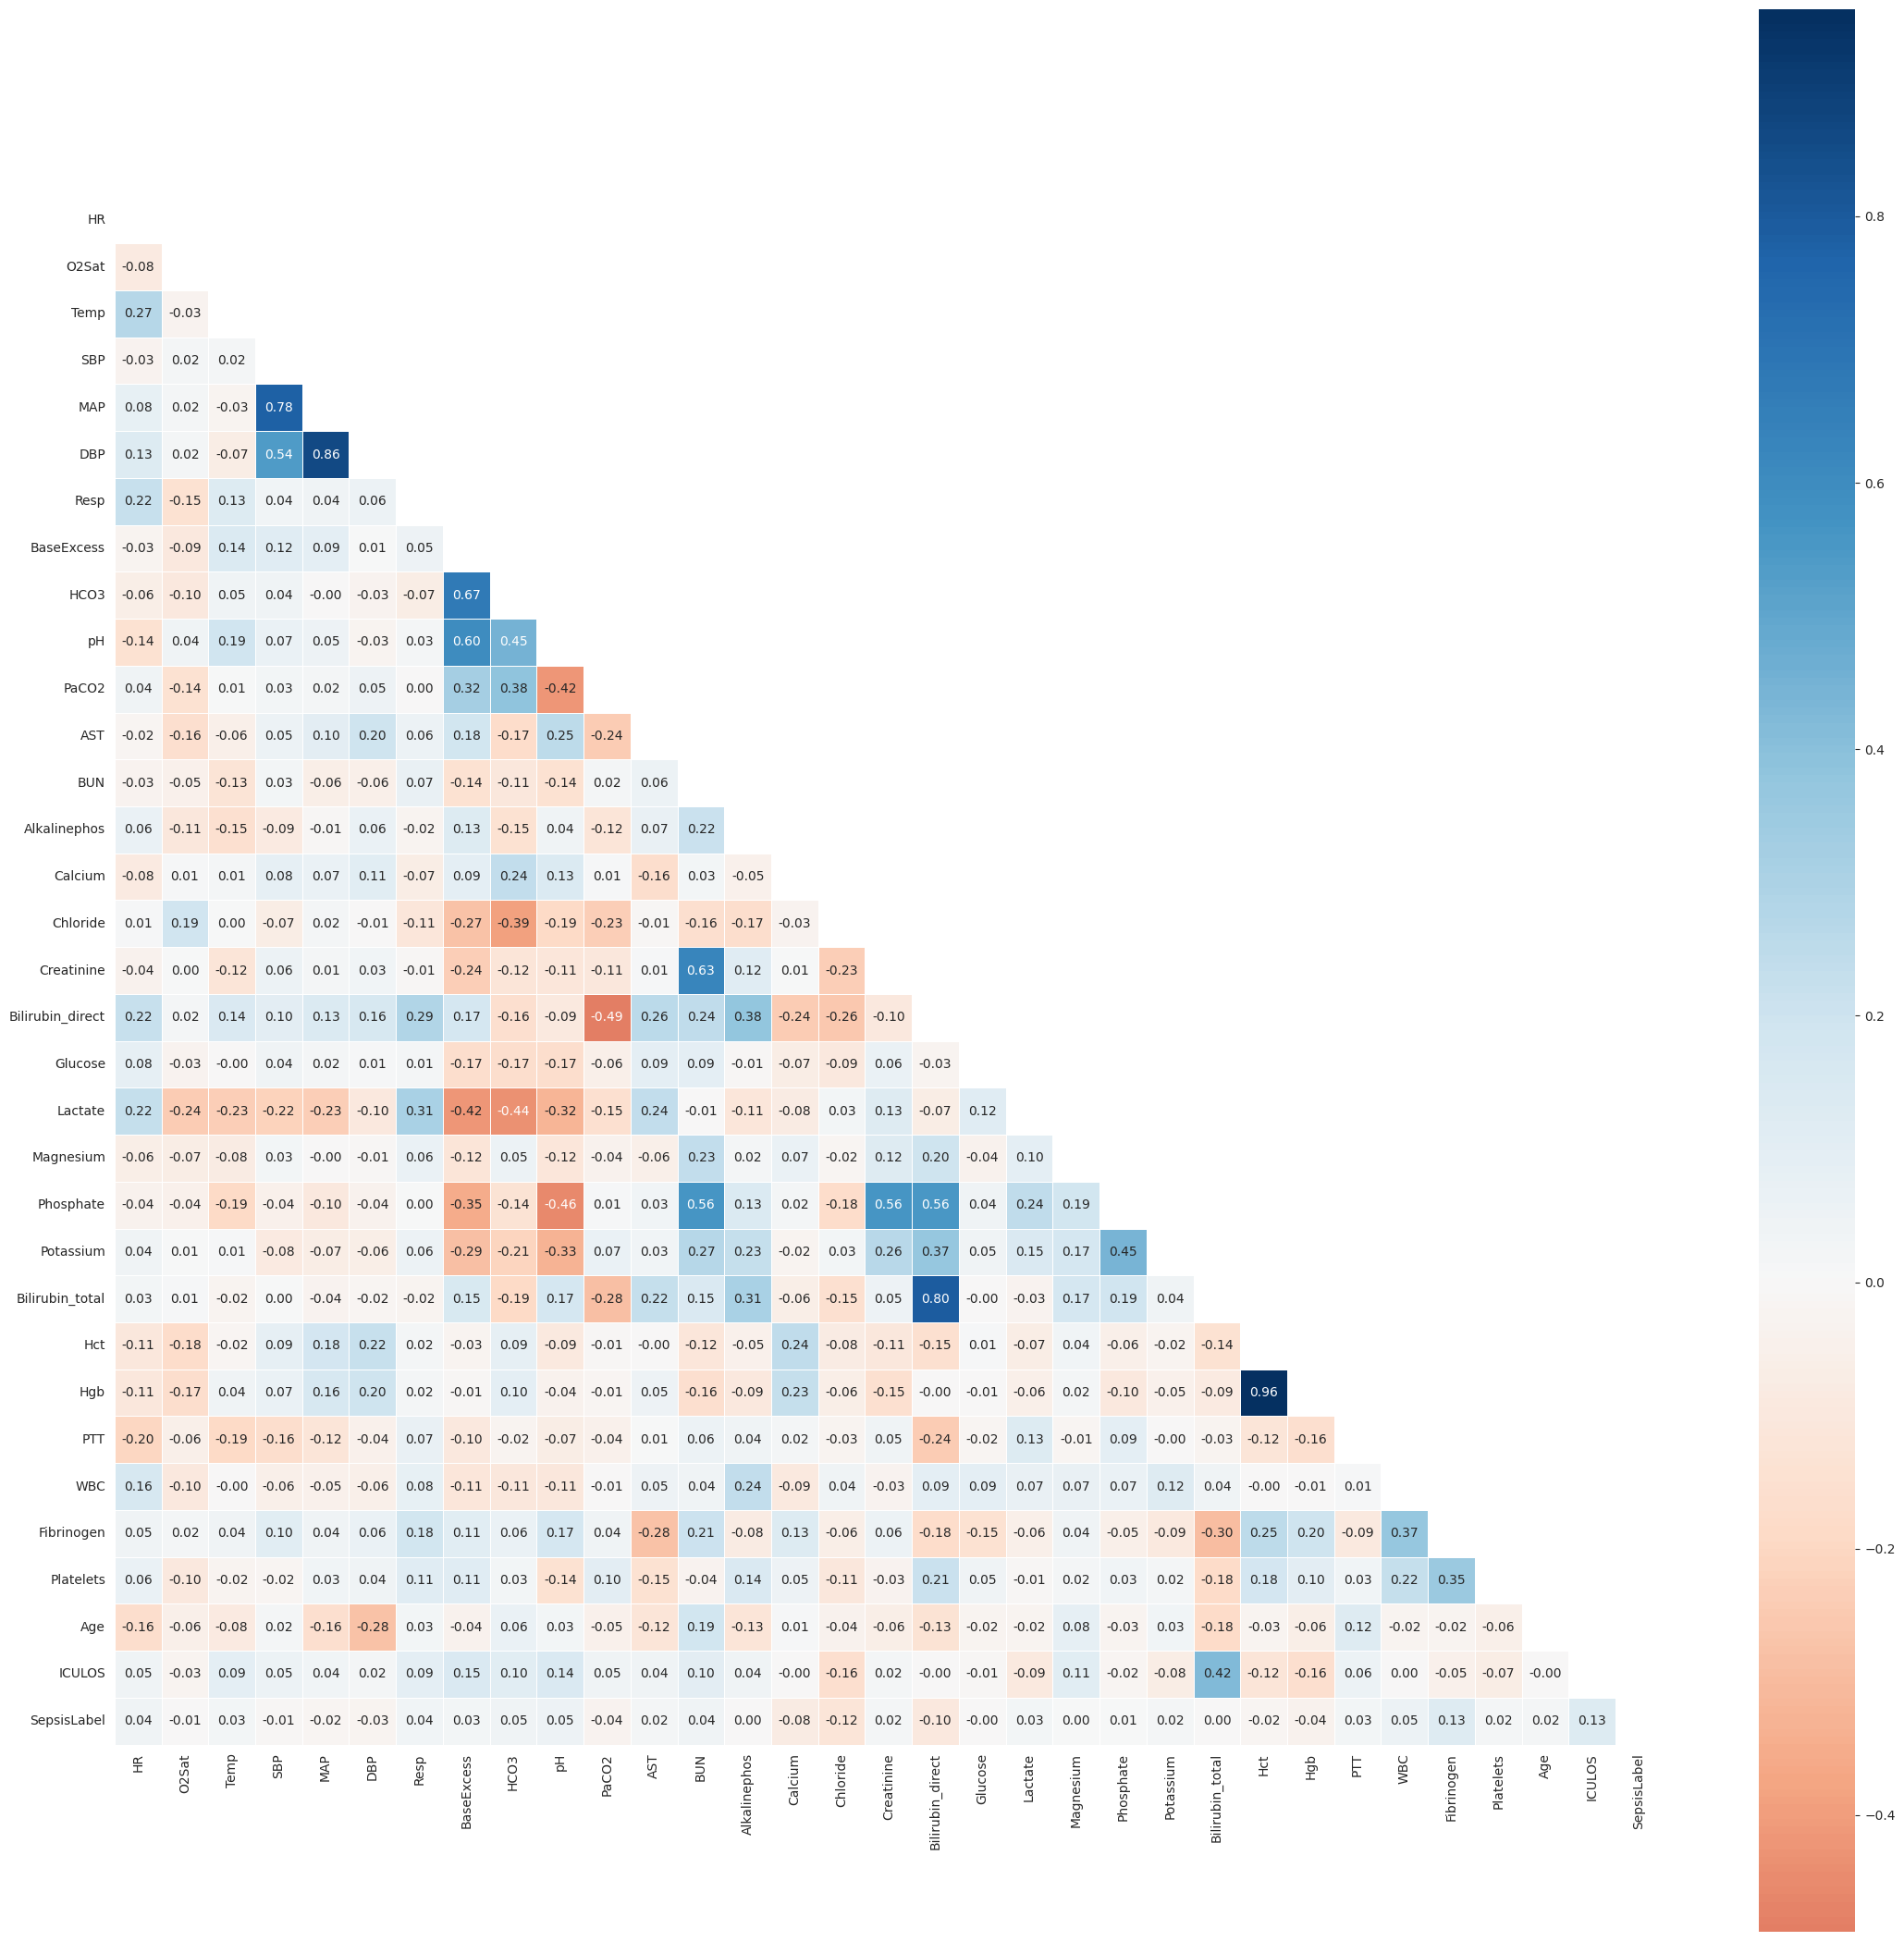

In [17]:
#X_train.columns
import numpy as np

correlacion_entre_variables = ["HR", "O2Sat", "Temp", "SBP", "MAP", "DBP", "Resp", "BaseExcess", "HCO3", "pH", "PaCO2", "AST",
                       "BUN", "Alkalinephos", "Calcium", "Chloride", "Creatinine", "Bilirubin_direct", "Glucose", "Lactate",
                       "Magnesium", "Phosphate", "Potassium", "Bilirubin_total", "Hct", "Hgb", "PTT", "WBC",
                       "Fibrinogen", "Platelets", "Age", "ICULOS","SepsisLabel"]

#mat_corr = X_train[correlacion_entre_variables].corr()
mat_corr = df[correlacion_entre_variables].corr()
mask = np.zeros_like(mat_corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(27,27))
sns.heatmap(mat_corr, mask=mask, square=True, annot=True, fmt=".2f", center=0, linewidths=.5, cmap="RdBu")

plt.savefig("corr_mat.png", dpi=400)

Por medio del análisis de correlación, se pudo notar que las variables SBP, MAP, y DBP están correlacionadas entre ellas. Esto es coherente con el conocimiento clínico de las integrantes del grupo, y por consenso se ha eligido mantener solo una, y esta es la Presión arterial media ó MAP.

## Imputación de los datos

La imputación por KNN (K-Nearest Neighbors) es un método utilizado para llenar valores faltantes en un conjunto de datos. En lugar de simplemente rellenar los espacios vacíos con un valor fijo como la media o mediana, el algoritmo busca las observaciones más similares (vecinos más cercanos) a la observación con el valor faltante. Luego, utiliza la información de estos vecinos para estimar y completar los valores faltantes. Para asegurarse de que todas las variables tengan el mismo peso en el cálculo de las distancias, se normalizan los datos antes de aplicar el algoritmo. Finalmente, después de rellenar los valores, los datos pueden ser restaurados a su escala original si es necesario. Este proceso ayuda a mantener la coherencia de los datos al aprovechar la similitud entre las observaciones.

In [29]:
# Importar las librerías necesarias
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler



# Revisar los valores faltantes antes de la imputación
print("Valores faltantes antes de la imputación:")
print(df.isnull().sum())

# Normalización de las variables numéricas
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Aplicación de KNN Imputation
# n_neighbors define cuántos vecinos considerar para la imputación (por defecto suele usarse 5)
imputer = KNNImputer(n_neighbors=5)

# Imputación de los valores faltantes
df_imputed_scaled = imputer.fit_transform(df_scaled)

# Convertimos los datos imputados a un DataFrame
df_imputed = pd.DataFrame(df_imputed_scaled, columns=df.columns)

# Revertir la normalización (opcional, si deseas regresar a los valores originales escalados)
df_imputed = pd.DataFrame(scaler.inverse_transform(df_imputed), columns=df.columns)

# Revisar los valores faltantes después de la imputación
print("Valores faltantes después de la imputación:")
print(df_imputed.isnull().sum())

# Guardar el dataframe imputado
df_imputed.to_csv('datos_imputados_knn.csv', index=False)

print("Imputación completada y datos guardados en 'datos_imputados_knn.csv'.")


Valores faltantes antes de la imputación:
HR                   1589
O2Sat                2043
Temp                10318
SBP                  2318
MAP                  2000
DBP                  4894
Resp                 2474
EtCO2               14952
BaseExcess          14743
HCO3                14879
FiO2                14290
pH                  14521
PaCO2               14701
SaO2                14994
AST                 15261
BUN                 14476
Alkalinephos        15259
Calcium             14600
Chloride            14822
Creatinine          14591
Bilirubin_direct    15486
Glucose             12883
Lactate             15122
Magnesium           14574
Phosphate           14904
Potassium           14103
Bilirubin_total     15268
Hct                 14196
Hgb                 14369
PTT                 15065
WBC                 14529
Fibrinogen          15414
Platelets           14591
Age                     0
Gender                  0
Unit1                6104
Unit2                6

## Planteamiento de las hipótesis

Con base en el análisis exploratorio de datos, se plantean 3 hipótesis, a saber:

1.  Alteraciones en los signos vitales como frecuencia cardíaca ('HR'), saturación de oxígeno ('O2Sat'), temperatura corporal ('Temp') y presión arterial ('SBP', 'DBP', 'MAP') están asociadas con un mayor riesgo de sepsis.

2. Los signos vitales anormales, junto a el tiempo de estancia en la UCI, están asociados con un mayor riesgo de desarrollar sepsis.

3. Los signos vitales anormales, estancia prolongada en la UCI y valores paraclónicos anormales, se asocian a un mayor riesgo de desarrrolo de sepsis

In [26]:
variables_hipotesis_1 = ["HR", "O2Sat", "Temp","MAP", "Resp", 'SepsisLabel', 'Patient_ID']

variables_hipotesis_2 = ["HR", "O2Sat", "Temp","MAP", "Resp", 'SepsisLabel', 'Patient_ID','ICULOS']

variables_hipotesis_3 = ["HR", "O2Sat", "Temp","MAP", "Resp", 'SepsisLabel', 'Patient_ID','ICULOS','WBC', 'Hgb','Bilirubin_total']

data_hipotesis_1 = df_imputed[variables_hipotesis_1]

data_hipotesis_2 = df_imputed[variables_hipotesis_2]

data_hipotesis_3 = df_imputed[variables_hipotesis_3]


# Creación del modelo

In [31]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_curve, auc


y = df_imputed["SepsisLabel"]
X = df_imputed.drop(["SepsisLabel"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#smote = SMOTE(random_state=42)
#X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)

# Dividir los datos en conjuntos de entrenamiento y prueba
X = df_imputed.drop("SepsisLabel", axis=1)
y = df_imputed["SepsisLabel"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar un modelo de regresión logística
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Realizar predicciones
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

accuracy, precision, f1, roc_auc

Accuracy: 0.9828215589435259
Precision: 0.5952380952380952
F1 Score: 0.38461538461538464
ROC AUC: 0.97629529039575


(0.9828215589435259, 0.5952380952380952, 0.38461538461538464, 0.97629529039575)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b931f52d-e49b-43bc-8480-f1d6d97b9312' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>